# K MEANS ASSIGNMENT
<hr style="height:5px;border-width:2;color:gray">

<div class = "alert alert-block alert-info">
<b><u>Note</u></b>:<br>
Since we are nearing the end of this course, this assignment is mostly unguided. This is done so for two reasons:<br>
    <ol>
        <li>This is a relatively easier algorithm to implement.</li>
        <li>This will also help you gear up for the final task we have in store for you &#x1F609;.</li>
    </ol>
</div>

In this Assignment you will be implementing K Means from scratch on your own. If you have gone through the theory material, you will have implemented K Means using scikit learn. However to get a better understanding of what is actually happening behind the scenes, you will be implementing K Means from scratch.

#### Dataset
You are given a file "data.npy" along with this assignment notebook. Load the numpy array from that file and cluster on that data.

#### Tasks
<ul>
    <li>
        <b>Creating Functions</b>:<br>
        You are expected to create the following functions.
        <ul>
            <li>Model function that implements K Means given K value and data. It should return the cluster centers.</li>
            <li>Error function that calculates the SSE given cluster centers and data. It should return SSE value.</li>
            <li>Function to plot Elbow plot given maximum number of K values and data.</li>
        </ul>
        Apart from these you can create as many helper funtions as you want but these three functions must be defined.
    </li>
    <li>
        <b>Clustering</b>:<br>
        Here you are expected to perform K Means clustering on the given data using the suitable K Value and then give suitable cluster centers.
    </li>
</ul>

#### Evaluation
In this Assignment you will be scored solely on the correctness and efficiency of your implementation.

#### Important note
<b>You are not allowed to use any library other than numpy and matplotlib (You can use seaborn instead of matplotlib if you wish to do so).</b>

You can find many implementations of K Means from scratch online but please refrain from looking into those and try implementing on your own just using the theory that you know.

Now that you have read all this, Code on!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\Arjun Prasad\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def loadData():
    data = np.load("data.npy")
    return data
data = loadData()

In [3]:
def initializeCentroids(k, data):
    centroids = data.copy()
    k = np.random.randint(0, 150, size= k)
    return centroids[k]

In [4]:
def sqDistances(data, centroids):
    return ((data - centroids[:, np.newaxis])**2).sum(axis=2)

In [5]:
def assignCentroids(data, centroids):
    sq_distances= sqDistances(data, centroids).astype(float)
    return np.argmin(sq_distances, axis=0)

In [6]:
def computeCentroids(data, closestCentroid, centroids ):
    newCentroids = np.array([data[closestCentroid == k ].mean(axis=0) for k in range(centroids.shape[0])])
    return newCentroids

In [7]:
def KMeans(k, data):
    max_iter = 500
    min_SSE = np.inf

    for i in range(50):
        centroids = initializeCentroids(k, data)

        for i in range(max_iter):
            centroids = computeCentroids(data, assignCentroids(data, centroids), centroids)
        sse = SSE(data, centroids)
        if (sse < min_SSE):
            best_centroids = centroids
    return best_centroids
#KMeans(3, data)

In [8]:
def SSE(data, centroids):
    sq_distances = sqDistances(data, centroids)
    return np.sum(sq_distances.min(axis = 0))
#SSE(data, KMeans(4, data))

In [9]:
def elbowPlot(max_k, data):
    K = np.arange(1, max_k+1, 1)
    sseVals = np.zeros(max_k)
    
    for k in K:
        sseVals[k-1] = SSE(data, KMeans(k, data))
    
    plt.figure(figsize=(7,7))
    plt.plot(K, sseVals)
    plt.xlabel("number of clusters")
    plt.ylabel("sum of squared errors ie inertia")

    return 

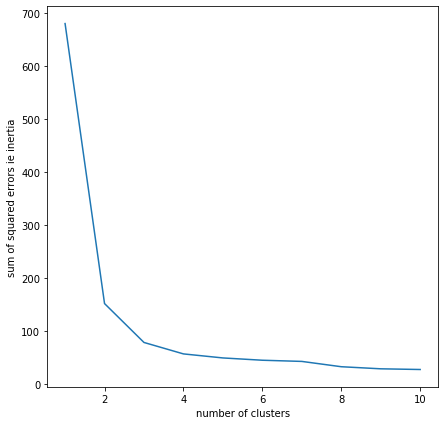

In [10]:
elbowPlot(10, data)

In [11]:
print("ideal number of clusters is 3")

ideal number of clusters is 3


In [12]:
KMeans(3, data)

array([[4.74166667, 2.95416667, 1.75416667, 0.32916667],
       [5.21666667, 3.64      , 1.47333333, 0.28      ],
       [6.31458333, 2.89583333, 4.97395833, 1.703125  ]])